In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn as sk
import os
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from training_functions import *

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# 1) Preprocessing the data

Droping some columns and normalizing the data or not depending on the future algorithm used

In [22]:
#normalizing = {"x2": False, "x3": True, "x4": False, "x7": False, "x8": False, "x9": True, "x10": True, "x13": False}
#normalizing = {"x2": True, "x3": True, "x4": True, "x7": True, "x8": True, "x9": True, "x10": True, "x13": True}
normalizing = {"x2": False, "x3": False, "x4": False, "x7": False, "x8": False, "x9": False, "x10": False, "x13": False}
drops = {"x11": True, "x12": True}
df, normalizing_dict = preprocessing_trainset(normalizing, drops)
df_eval, y_replacement = preprocessing_testset(normalizing_dict, drops)

Exploring the training set

In [23]:
df.head()

y       x1          x2          x3         x4       x7       x8  \
0  0  1.42038   735.17784  1001.01801 -141.68616  0.95499 -1.69662   
1  2 -0.30564 -1172.52474  1000.63509   30.72446 -2.29523 -0.28491   
2  0  1.41124 -2270.39585  1000.30931 -140.91191  0.90352 -0.55290   
3  0  0.40752 -1691.50839  1000.62735  -40.61188  3.56674 -1.05227   
4  2 -0.33494   188.67147  1000.64021   33.90150  1.33713 -0.85736   

           x9          x10      x13  
0  5473.72196 -89187.80109 -2.84076  
1  5475.64233 -89185.65052  0.61127  
2  5475.40290 -89187.49450 -2.82248  
3  5475.19784 -89185.42391 -0.81505  
4  5474.62033 -89185.55029  0.66987

In [24]:
df_eval.head()

x1          x2          x3         x4       x7       x8          x9  \
0 -0.19528  1813.16939  1000.47742   19.92780 -2.11119  1.07467  5475.23204   
1  0.96711  1039.24998  1000.59127  -96.24958  0.29538  0.28703  5474.36969   
2 -0.36744   791.84564  1000.87490   36.95219 -2.22641  2.15474  5473.33639   
3 -1.72245   -92.98303  1000.48905  172.32768 -3.72120  2.82907  5473.57009   
4  2.33596 -1265.86780  1000.51694 -233.36179  4.64681 -3.01512  5475.74198   

           x10      x13  
0 -89185.68603  0.39055  
1 -89187.04831 -1.93421  
2 -89184.93092  0.73489  
3 -89186.46529  3.44490  
4 -89186.14419 -4.67193

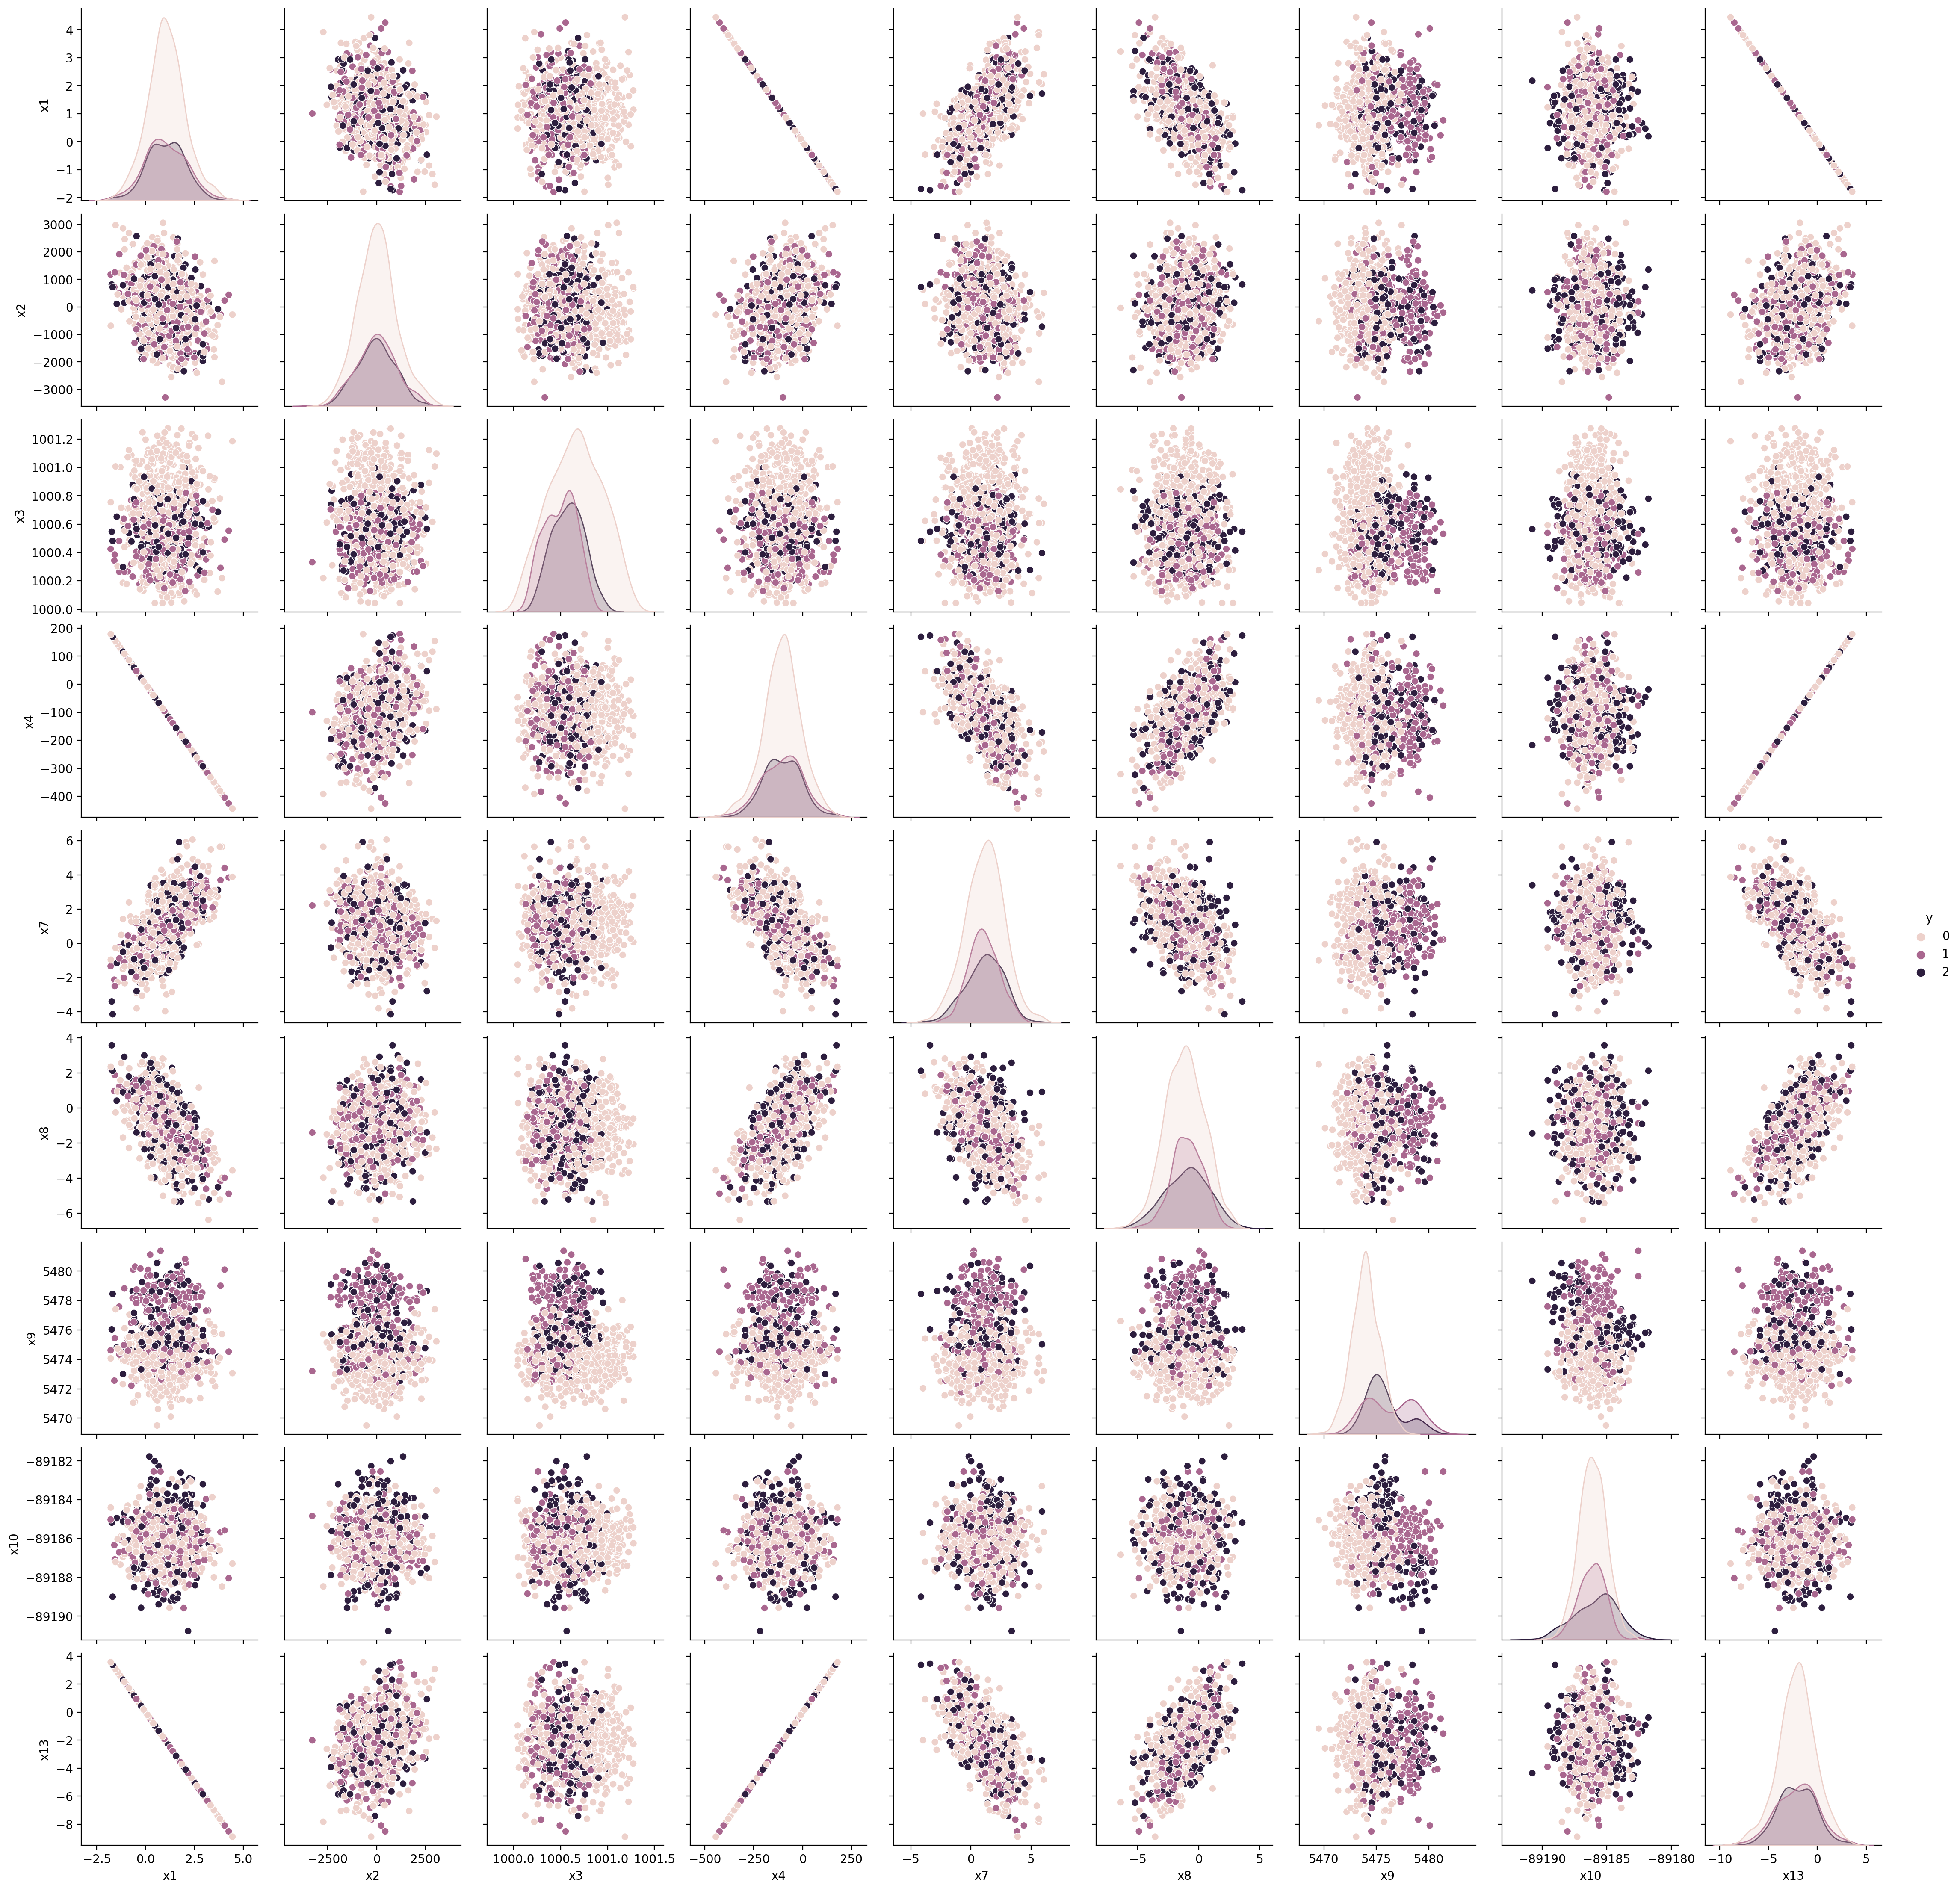

In [136]:
sns.pairplot(df, hue="y")

Splitting the data between train and test data

In [89]:
X, y = df.drop(columns="y").to_numpy(), df["y"].to_numpy()
X_eval = df_eval.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

Running a PCA to lower the dimension for better results

In [90]:
pcadim = 8
pca = decomposition.PCA(n_components=pcadim)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_eval = pca.transform(X_eval)

# 2) Trying different classification algorithms

In [ ]:
svm_clf = svm.SVC(C=1, kernel="poly", degree=2)
clf_dict = {"SVM": svm_clf}

In [38]:
forest_clf = RandomForestClassifier(n_estimators=100, max_features=2, min_samples_leaf=1, criterion="gini", n_jobs=4)
clf_dict = {"Random Forest": forest_clf}
# n_estimators=100, max_features=2 -> 76 ± 1.98

In [ ]:
adaboost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, estimator=DecisionTreeClassifier(max_depth=1, criterion="entropy"))
clf_dict = {"AdaBoost": adaboost_clf}

In [ ]:
adaboost_clf2 = AdaBoostClassifier(n_estimators=20, learning_rate=4, estimator=RandomForestClassifier(n_estimators=100, max_features=2, n_jobs=4))
clf_dict = {"AdaBoost": adaboost_clf2}
# n_estimators=20, learning_rate=3 -> 74.7 ± 2.05

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, base_score=0.55, n_jobs=4)
clf_dict = {"XGBoost": xgb_clf}
# n_estimators=100, base_score=0.55 -> 74.3 ± 2.12

In [ ]:
gaussianNB_clf = GaussianNB()
clf_dict = {"Gaussian NB": gaussianNB_clf}
# -> 70.3 ± 2.09

In [ ]:
KNN_clf = KNeighborsClassifier(n_neighbors=50, n_jobs=4)
clf_dict = {"KNN": KNN_clf}

Running cross-validation for the model in the cell just run

In [9]:
cross_validation(clf_dict, X_train, y_train)

{'Random Forest': {'Stratified-0': array([0.76875   , 0.79375   , 0.7625    , 0.72955975, 0.77987421]),
  'Shuffled stratified-0': array([0.73125, 0.7125 , 0.7375 , 0.775  , 0.74375, 0.775  , 0.79375,
         0.75625, 0.7625 , 0.8    ]),
  'Stratified-1': array([0.8125    , 0.71875   , 0.73125   , 0.77987421, 0.75471698]),
  'Shuffled stratified-1': array([0.83125, 0.775  , 0.76875, 0.73125, 0.76875, 0.7625 , 0.75   ,
         0.76875, 0.81875, 0.81875]),
  'Stratified-2': array([0.7875    , 0.73125   , 0.73125   , 0.81132075, 0.76100629]),
  'Shuffled stratified-2': array([0.775  , 0.7625 , 0.725  , 0.71875, 0.79375, 0.75   , 0.75   ,
         0.73125, 0.75   , 0.74375]),
  'Stratified-3': array([0.74375   , 0.79375   , 0.6875    , 0.80503145, 0.74213836]),
  'Shuffled stratified-3': array([0.75   , 0.75625, 0.78125, 0.75625, 0.76875, 0.79375, 0.78125,
         0.75625, 0.7    , 0.74375]),
  'Stratified-4': array([0.74375   , 0.8       , 0.78125   , 0.74213836, 0.7672956 ]),
  'Shuff

In [94]:
test_classifier(list(clf_dict.values())[0], normalizing, drops, pcadim=8, test_size=0.3, ntrials=50)

Trial: 0 Accuracy 73.3
Trial: 10 Accuracy 72.3
Trial: 20 Accuracy 81.3
Trial: 30 Accuracy 71.7
Trial: 40 Accuracy 74.7
Final mean classification accuracy  76.1 ± 2.07


Verifying score on the initial train-test-split

In [131]:
list(clf_dict.values())[0].fit(X_train, y_train)
list(clf_dict.values())[0].score(X_test, y_test)

0.775

# 3) Saving the predictions in a text file

In [135]:
y_eval_num = list(clf_dict.values())[0].predict(X_eval)
y_eval_pred = [y_replacement[val] for val in y_eval_num]
print(len(y_eval_pred))

fname = "prediction.txt"
if not os.path.exists(fname):
	with open(fname,'w') as file:
		file.write('\n'.join(y_eval_pred))
else:
	print("File already exists !!")

10000
File already exists !!
